# Experiência 1: Filtragem de um sinal ruidoso

Jean Carlos Mello Xavier Faria - 11259628

Oliver


In [29]:
using Plots
using WAV
using DSP
using Statistics

$\textbf{a)}$ O sinal solicitado foi gerado com frequência de amostragem igual a 40kHz por 2 segundos.

O sinal discreto pode ser visualizado na imagem a seguir.



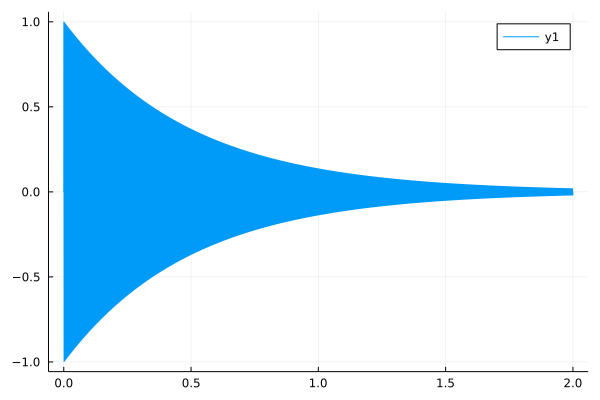

In [2]:
Ω = 2π*500
τ = 0.5
t=0:1/40000:2

x0 = sin.(Ω * t).^3 .* (exp.(-t./τ))
plot(t, x0)

O comprimento do sinal pode ser visto com a função size().

In [3]:
size(x0)

(80001,)

Portanto, o comprimento do sinal vale 80001.

Além disso, é possível escutar o sinal com a função wavplay().

In [4]:
wavplay(x0, 40000)

$\textbf{b)}$ Obtemos o ruido a partir da função "randn()", dessa forma conseguimos um sinal aleatório com distribuição gaussiana

In [5]:
vx = randn(length(x0), 1);

Para obter o ruído desejado, fazendo com que o sinal $x_0[n]$ tenha $SNR=10dB$. Será necessário calcular a potência do sinal, dada pela equação: $P=\frac{1}{N} \sum\limits_{n=0}^{N-1}x_{0}^{2}[n]$, isto é, a média dos valores de $x_0[n]$ ao quadrado.

In [6]:
# Cálculo da potência
x02 = x0.^2

P_x0 = mean(x02)

0.03904888633891437

Utilizando a fórmula do $SNR=\frac{P_{sinal}}{P_{ruido}}=\left( \frac{A_{sinal}}{A_{ruido}} \right)^2$, portanto, $A_{ruído}=\sqrt{\frac{P_{sinal}}{SNR}}$, como é desejado SNR em db, fazendo a conversão da escala linear para db, a equação fica: $A_{ruído}=\sqrt{P_{sinal}\cdot10^{\frac{-SNR}{10}}}$, por fim esse valor é multiplicado no ruído.

In [7]:
SNR = 10
A = sqrt(P_x0*10^(-SNR/10))
vx = A.*vx;

80001×1 Matrix{Float64}:
  0.04780659343402175
  0.03519619694641025
 -0.011102298360452945
  0.09024300896921592
  0.0751796900671795
  0.057952380445881385
  0.052837682657557096
  0.1296206594104945
  0.02346174370615849
 -0.02219863169118885
  0.053906598026330986
 -0.01198667220595494
 -0.1501445213937211
  ⋮
 -0.1097678431718233
 -0.007178918248943861
  0.03760041240593183
 -0.05643867476216785
 -0.09824006647128133
  0.031092892829351383
  0.025028118175645864
 -0.016754515843055012
 -0.012238504113609687
 -0.05904534750368301
  0.060176074211215576
  0.025155949667077893

Realizando a plotagem do gráfico com ruído e sem ruído.

In [17]:
x = x0 + vx

plot(t, x, label = "x[n] + v[n]")
plot!(t, x0, label = "x[n]")

Escutando o sinal com ruído.

In [18]:
wavplay(x, 40000)

$\textbf{c)}$ Para criarmos o filtro, criamos um sinal no formato "sinc" conforme solicitado e utilizamos a função "PolinomialRatio()"

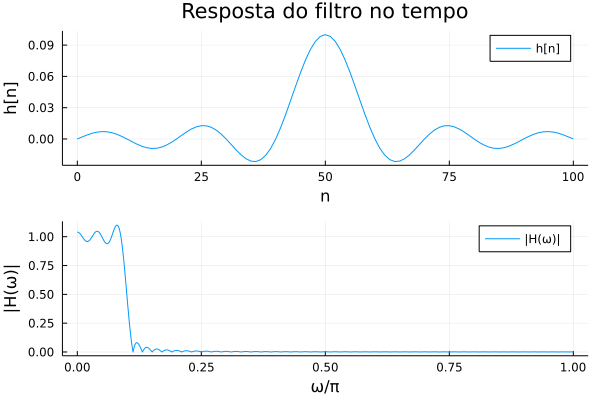

In [43]:
n = 0:100
hn = 0.1*sinc.(0.1*(n.-50))

p1 = plot(n, hn, xlabel="n", ylabel="h[n]", title="Resposta do filtro no tempo", label="h[n]") #No tempo
hnf = PolynomialRatio(hn, [1])

ω=range(0,π, length=80001)

H = freqz(hnf, ω)
p2 = plot(ω/π, abs.(H), xlabel="ω/π", ylabel = "|H(ω)|", label="|H(ω)|")
plot(p1, p2, layout = (2, 1))

$\textbf{d)}$ Utilizando a função "filt()" obtemos os sinais $x_0[n]$ e $x[n]$ filtrados

In [46]:
yn = filt(hn, [1], x)
y0n = filt(hn, [1], x0)

plot(t, yn, label="y[n]")
plot!(t, y0n, label="y0[n]")

In [47]:
wavplay(yn, 40000)

In [48]:
wavplay(y0n, 40000)

$e)$ Para um processo ser dito estacionário, ele não deve variar no tempo. Como $x[n]$ é uma função que depende do tempo e $y[n]$, consequentemente, depende de t também, ambos não são estacionários. Já $v_{x}[n]=x[n]-x_{0}[n]$ e $v_{y}[n]=y[n]-y_{0}[n]$ será o próprio ruído branco gaussiano, cancelando a parcela que depende do tempo, sendo dessa forma, processos estacionários. 

### f)

Temos que a densidade espectral de potência do ruído de entrada é: $S_X(\omega) = \sigma^2$, já que estamos tratando de um ruído branco.

In [15]:
N = 1000
L = 1000
n = 0:Nit-1
x0 = sin.(Ω * n).^3 .* (exp.(-n./τ))

for i=1:L
    vx = A.*randn(N)
    x = x0 .+ vx
    x .= x.^2
    print("Média de x^2_"*string(i)*": ",mean(x),"\n")
end

LoadError: UndefVarError: Nit not defined